In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
img_dir = "C:/Users/Kacper/Desktop/github/OneFish-Disseration-Project/Model/img"
# Define image size and number of classes
img_size = 224
num_classes = 30
batch_size = 32

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(img_size,img_size),
    batch_size= batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 7482 files belonging to 30 classes.
Using 5986 files for training.
Found 7482 files belonging to 30 classes.
Using 1496 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Abramis brama (Common bream)', 'Acipenseridae (Sturgeon)', 'Anguilla anguilla (European eel)', 'Aspius aspius (Asp)', 'Barbus barbus (Common barbel)', 'Blicca bjoerkna (silver bream)', 'Carassius carassius (Crucian carp)', 'Carassius gibelio (Prussian carp)', 'Ctenopharyngodon idella (Grass carp)', 'Cyprinus carpio (Common carp)', 'Esox lucius (Northern pike)', 'Gasterosteus aculeatus (Three-spined stickleback)', 'Gobio gobio (gudgeon)', 'Gymnocephalus cernuus (Eurasian ruffe)', 'Lepomis gibbosus (The pumpkinseed)', 'Leuciscus cephalus (common chub)', 'Leuciscus idus (Ide)', 'Leuciscus leuciscus (Common dace)', 'Neogobius fluviatilis (Monkey goby)', "Neogobius kessleri (Kessler's goby)", 'Neogobius melanostomus (Round goby)', 'Perca fluviatilis (European perch)', 'Rhodeus amarus (European bitterling)', 'Rutilus rutilus (Common roach)', 'Salmo trutta subsp. fario (Brown Trout)', 'Sander lucioperca (Zander)', 'Scardinius erythrophthalmus (Rudd)', 'Silurus glanis (Wels catfish)', 'Tinca

In [13]:
# Preprocess the data
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input # each model requires specific input so this function ensures that the data is in the required format.

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
# apply data argumentation to the images and applying the necessary preprocessing

tensorflow.python.data.ops.dataset_ops.MapDataset

In [14]:
# Build the model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights="imagenet",
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(img_size, img_size, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# Train the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

Epoch 1/10


c:\Users\Kacper\.conda\envs\tfgpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 [==============================] - 24s 95ms/step - loss: 2.2316 - accuracy: 0.3734 - val_loss: 1.8527 - val_accuracy: 0.4632
Epoch 2/10
188/188 [==============================] - 20s 105ms/step - loss: 1.4411 - accuracy: 0.5715 - val_loss: 1.5754 - val_accuracy: 0.5321
Epoch 3/10
188/188 [==============================] - 19s 99ms/step - loss: 1.2519 - accuracy: 0.6188 - val_loss: 1.5362 - val_accuracy: 0.5394
Epoch 4/10
188/188 [==============================] - 19s 102ms/step - loss: 1.1459 - accuracy: 0.6472 - val_loss: 1.4490 - val_accuracy: 0.5742
Epoch 5/10
188/188 [==============================] - 19s 99ms/step - loss: 1.0739 - accuracy: 0.6737 - val_loss: 1.3854 - val_accuracy: 0.5862
Epoch 6/10
188/188 [==============================] - 19s 102ms/step - loss: 1.0308 - accuracy: 0.6868 - val_loss: 1.3807 - val_accuracy: 0.5896
Epoch 7/10
188/188 [==============================] - 20s 105ms/step - loss: 0.9997 - accuracy: 0.6884 - val_loss: 1.3454 - val_accuracy: 0.6016

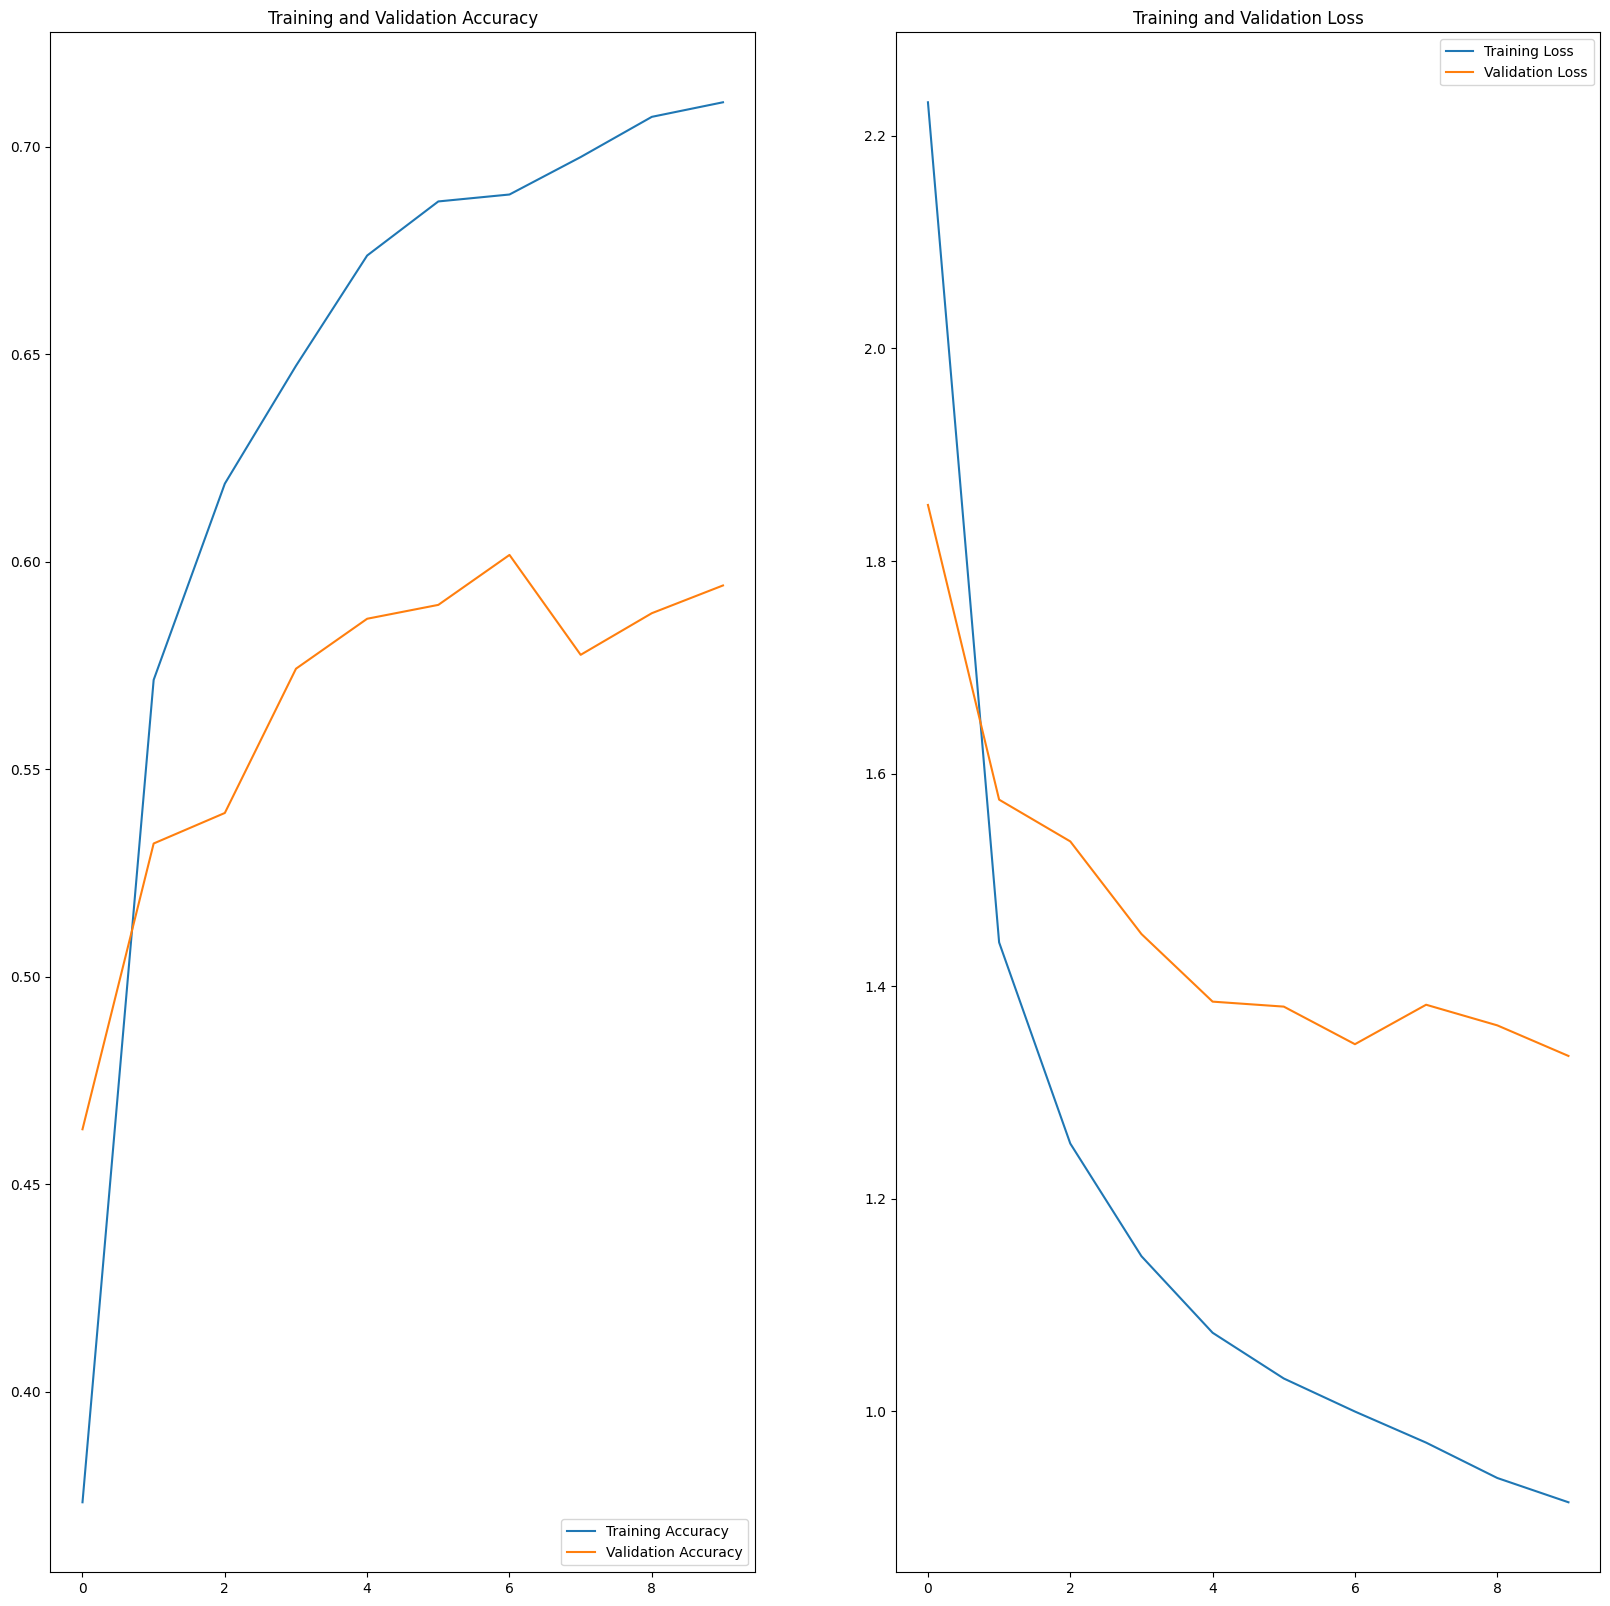

In [16]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [21]:
model.save("TransferModelv1.0.hdf5")

In [ ]:
class_names

<h1>Confusion matrix<h1>

1/1 [==============================] - 0s 19ms/step


<Axes: >

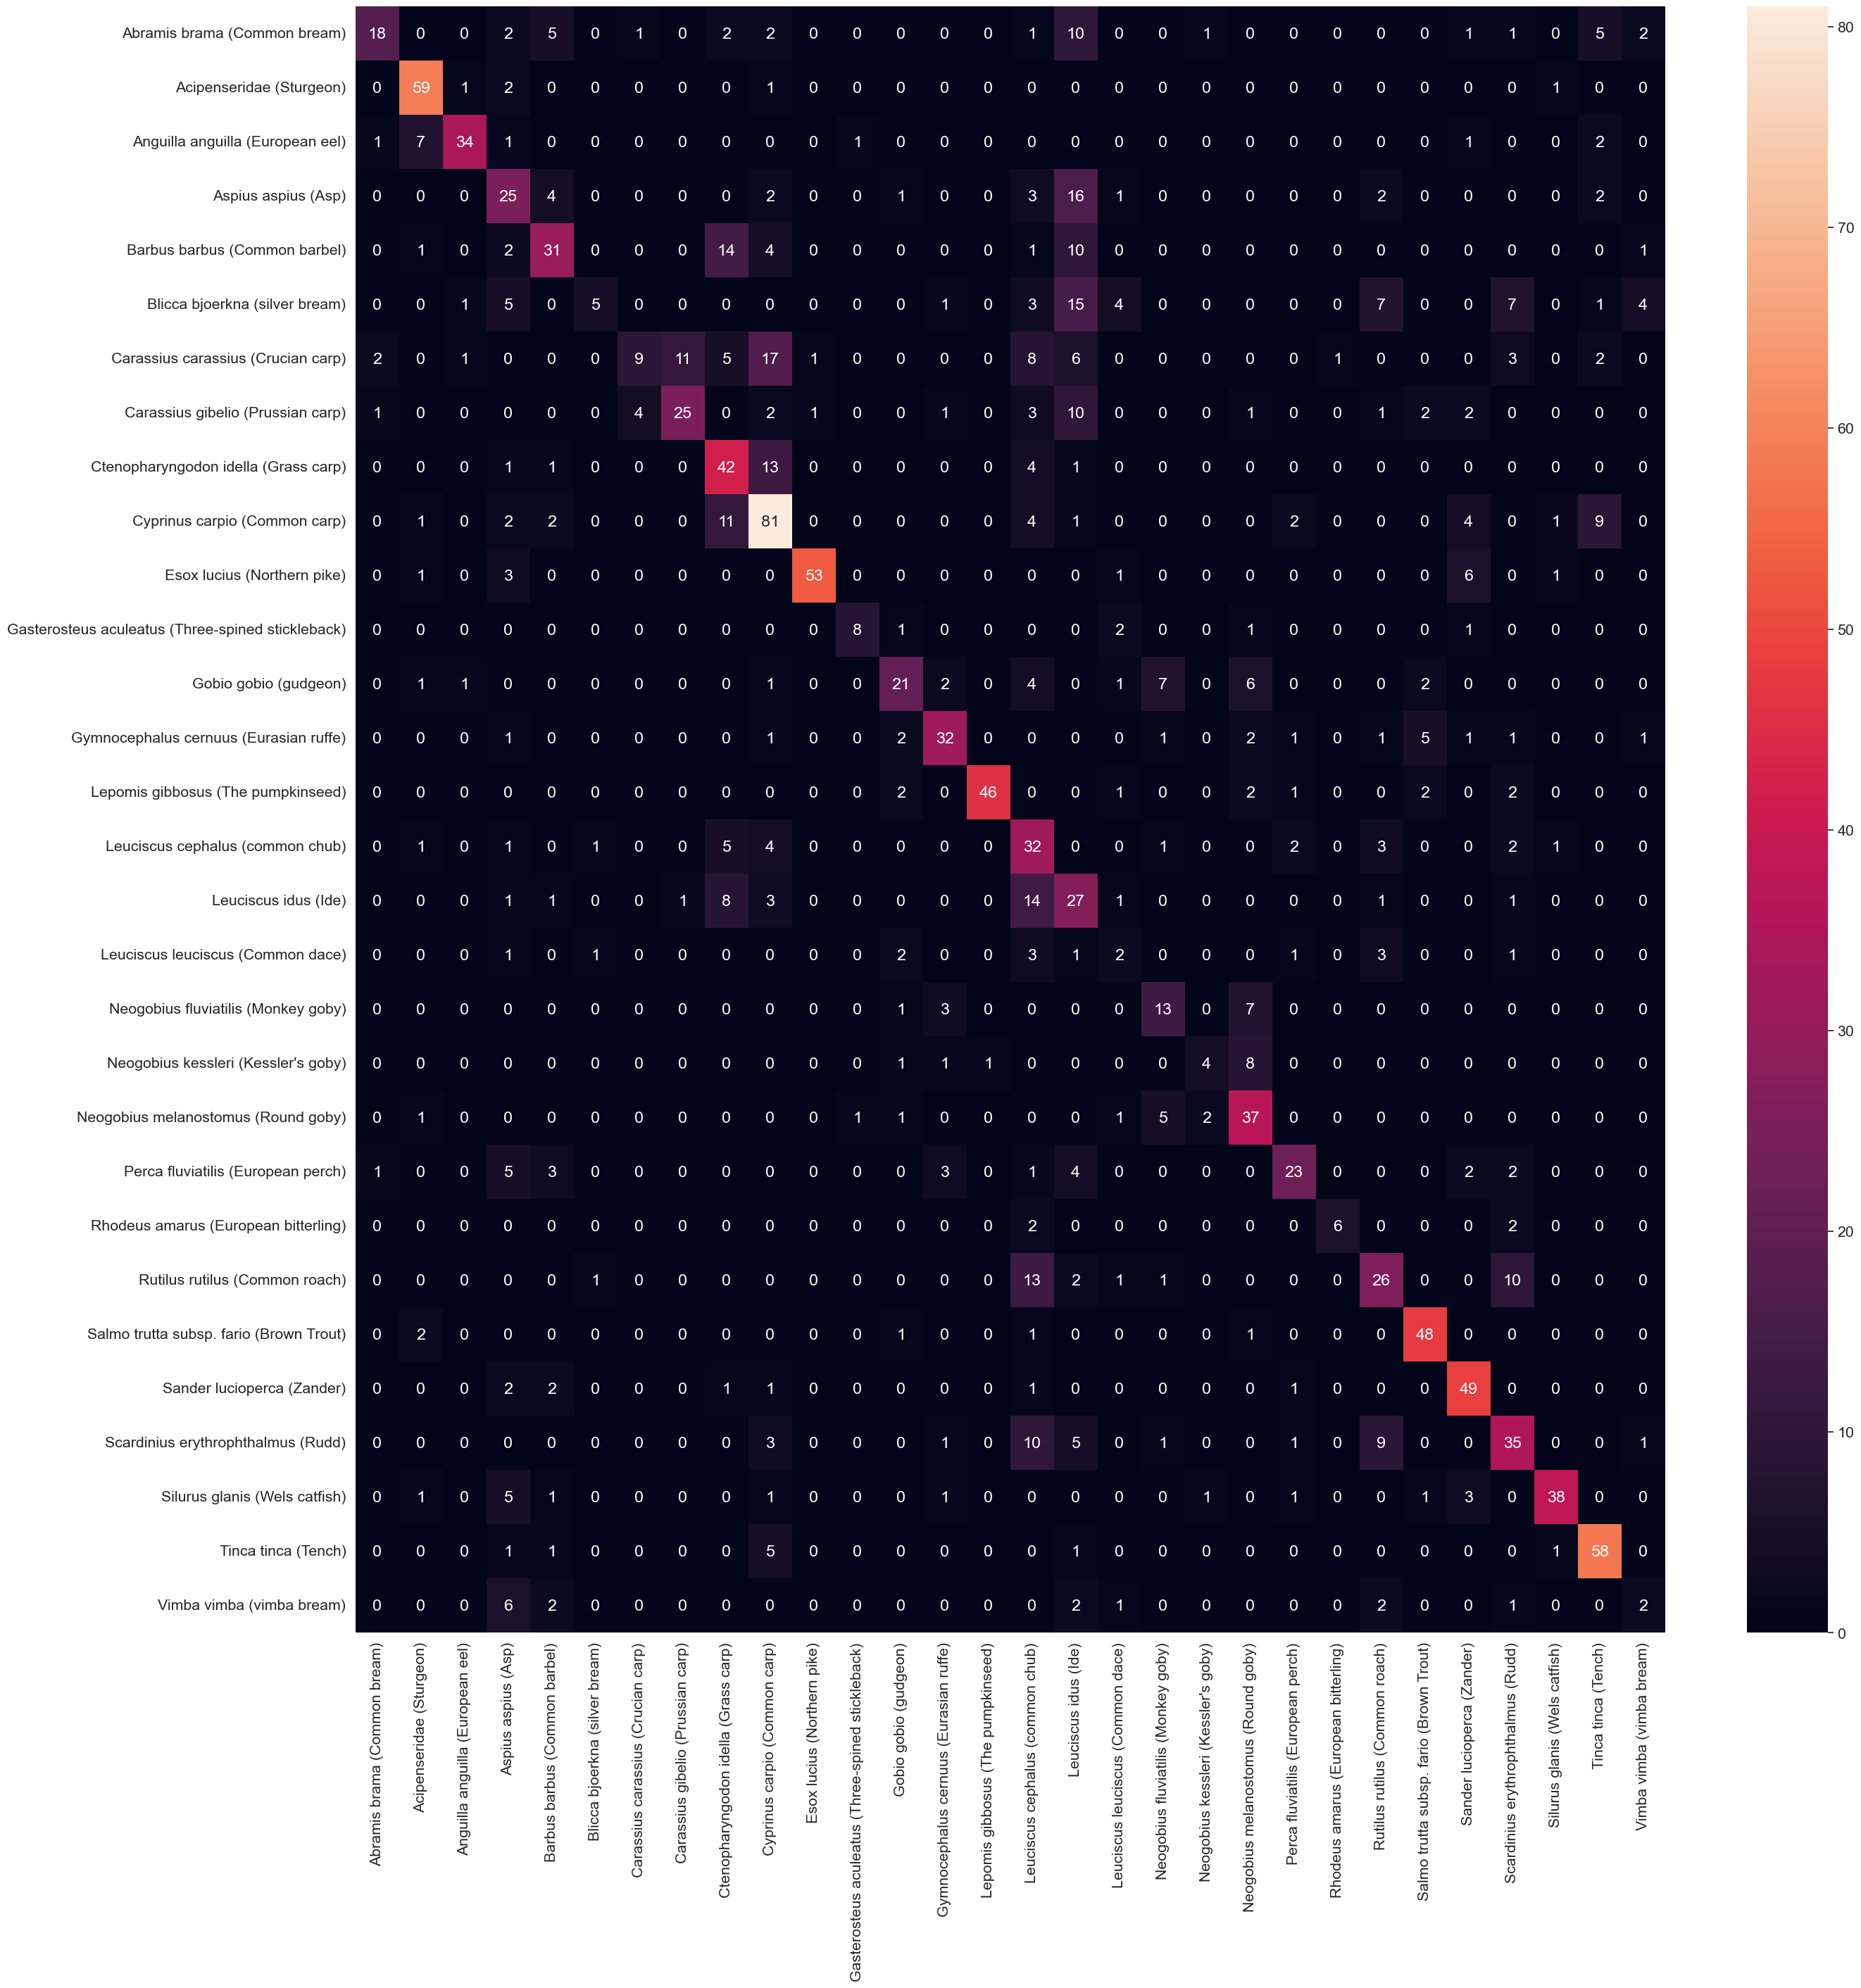

In [49]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

val_labels = []
val_pred_probs = []
for images, labels in val_ds:
    val_labels.extend(labels.numpy())
    pred_probs = model.predict(images)
    val_pred_probs.extend(pred_probs)
val_pred_labels = np.argmax(val_pred_probs, axis=1)
#produces the labes from the validation datset
# Generate confusion matrix
cm = confusion_matrix(val_labels, val_pred_labels)

# Create heatmap
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)